# Logistic Classification

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_excel('AirQualityUCI.xlsx')

In [7]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [8]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [9]:
## Temperature on the basis of other columns 

In [10]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [11]:
data.shape

(9357, 15)

In [12]:
# missing values , fill the values , probably remove the values , outliers check and we'll remove the outliers 

In [15]:
data['T'].sort_values()

6712   -200.000000
2428   -200.000000
4071   -200.000000
4070   -200.000000
4069   -200.000000
2429   -200.000000
2430   -200.000000
4068   -200.000000
4067   -200.000000
4066   -200.000000
2431   -200.000000
4065   -200.000000
4064   -200.000000
4063   -200.000000
4062   -200.000000
4061   -200.000000
4060   -200.000000
2432   -200.000000
2433   -200.000000
2434   -200.000000
2435   -200.000000
2436   -200.000000
4059   -200.000000
2437   -200.000000
2427   -200.000000
2438   -200.000000
2426   -200.000000
4073   -200.000000
4366   -200.000000
4367   -200.000000
           ...    
3094     41.099999
3239     41.125000
2612     41.250000
2854     41.300000
3167     41.300000
3117     41.324999
3141     41.350000
2615     41.375000
3166     41.400000
3118     41.425000
3191     41.599999
3164     41.749999
2875     41.775000
2613     41.775000
3236     41.875000
2877     41.925000
3211     42.000000
3189     42.049999
3235     42.174999
2614     42.200000
2852     42.500000
2851     42.

In [18]:
data = data.loc[data['T'] != -200.0]

In [33]:
data['T'].isnull().sum()

0

In [23]:
b = list(data.columns)
for i in b :
    print(i)
    print(data[i].isnull().sum())
    print(" ----- ")

Date
0
 ----- 
Time
0
 ----- 
CO(GT)
0
 ----- 
PT08.S1(CO)
0
 ----- 
NMHC(GT)
0
 ----- 
C6H6(GT)
0
 ----- 
PT08.S2(NMHC)
0
 ----- 
NOx(GT)
0
 ----- 
PT08.S3(NOx)
0
 ----- 
NO2(GT)
0
 ----- 
PT08.S4(NO2)
0
 ----- 
PT08.S5(O3)
0
 ----- 
T
0
 ----- 
RH
0
 ----- 
AH
0
 ----- 


In [31]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,-34.897053,1099.707856,-158.702591,10.082993,939.029205,163.732788,835.370973,56.654087,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,78.202259,217.084571,140.680200,7.449640,266.829000,252.081877,256.815106,126.902274,346.204540,398.480897,8.832888,17.316389,0.403813
min,-200.000000,647.250000,-200.000000,0.149048,383.250000,-200.000000,322.000000,-200.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,0.600000,936.750000,-200.000000,4.436942,734.375000,49.000000,657.875000,52.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,1.500000,1063.000000,-200.000000,8.239851,909.000000,139.800000,805.500000,96.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.600000,1231.250000,-200.000000,13.988478,1116.250000,280.000000,969.250000,132.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [28]:
data.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.117823,0.130118,0.068557,0.077337,0.532308,-0.081034,0.670109,-0.060628,0.122236,-0.130587,-0.020502,-0.187918
PT08.S1(CO),0.117823,1.000000,0.250615,0.883821,0.892972,0.564636,-0.771918,0.313563,0.682874,0.899326,0.048628,0.114607,0.135323
NMHC(GT),0.130118,0.250615,1.000000,0.136738,0.134304,0.000752,0.052205,0.106907,0.213857,0.111535,-0.068126,-0.014300,-0.123689
C6H6(GT),0.068557,0.883821,0.136738,1.000000,0.981962,0.538160,-0.735711,0.265889,0.765717,0.865727,0.198891,-0.061643,0.167909
PT08.S2(NMHC),0.077337,0.892972,0.134304,0.981962,1.000000,0.534248,-0.796687,0.285648,0.777235,0.880590,0.241330,-0.090352,0.186906
NOx(GT),0.532308,0.564636,0.000752,0.538160,0.534248,1.000000,-0.503130,0.821195,0.143481,0.622214,-0.242044,0.111549,-0.210075
PT08.S3(NOx),-0.081034,-0.771918,0.052205,-0.735711,-0.796687,-0.503130,1.000000,-0.287301,-0.538460,-0.796554,-0.145133,-0.056730,-0.232021
NO2(GT),0.670109,0.313563,0.106907,0.265889,0.285648,0.821195,-0.287301,1.000000,0.024831,0.338381,-0.139478,-0.082221,-0.257401
PT08.S4(NO2),-0.060628,0.682874,0.213857,0.765717,0.777235,0.143481,-0.538460,0.024831,1.000000,0.591137,0.561333,-0.032188,0.629644
PT08.S5(O3),0.122236,0.899326,0.111535,0.865727,0.880590,0.622214,-0.796554,0.338381,0.591137,1.000000,-0.027193,0.124952,0.070738


In [35]:
from sklearn.cross_validation import train_test_split

In [36]:
train = data[['CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','RH','AH']]

In [37]:
out = data['T']

In [42]:
x_train , x_test , y_train , y_test = train_test_split(train , out , test_size = 0.2)

In [43]:
x_train.shape

(7192, 9)

In [44]:
train.shape

(8991, 9)

In [45]:
x_test.shape

(1799, 9)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lreg = LinearRegression()

In [48]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
pd = lreg.predict(x_test)

In [51]:
lreg.score(x_test,y_test)

0.92800687340187926

In [52]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test,pd) * 100

92.800687340187935

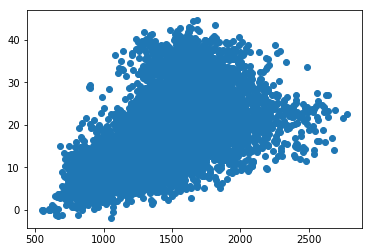

In [60]:
plt.scatter(x_train['PT08.S4(NO2)'],y_train)

#Continuos -> R2 SCORE(Linear Regression )
#Classifcation -> Accuracy Score . Logistic Classifier. 

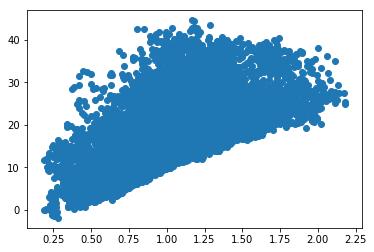

In [61]:
plt.scatter(x_train['AH'],y_train)

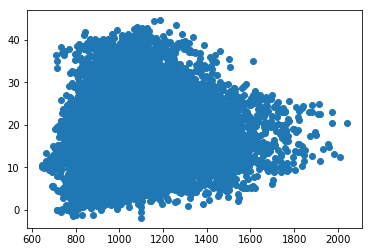

In [63]:
plt.scatter(data['PT08.S1(CO)'],data['T'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197690D3C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001976E178160>]], dtype=object)

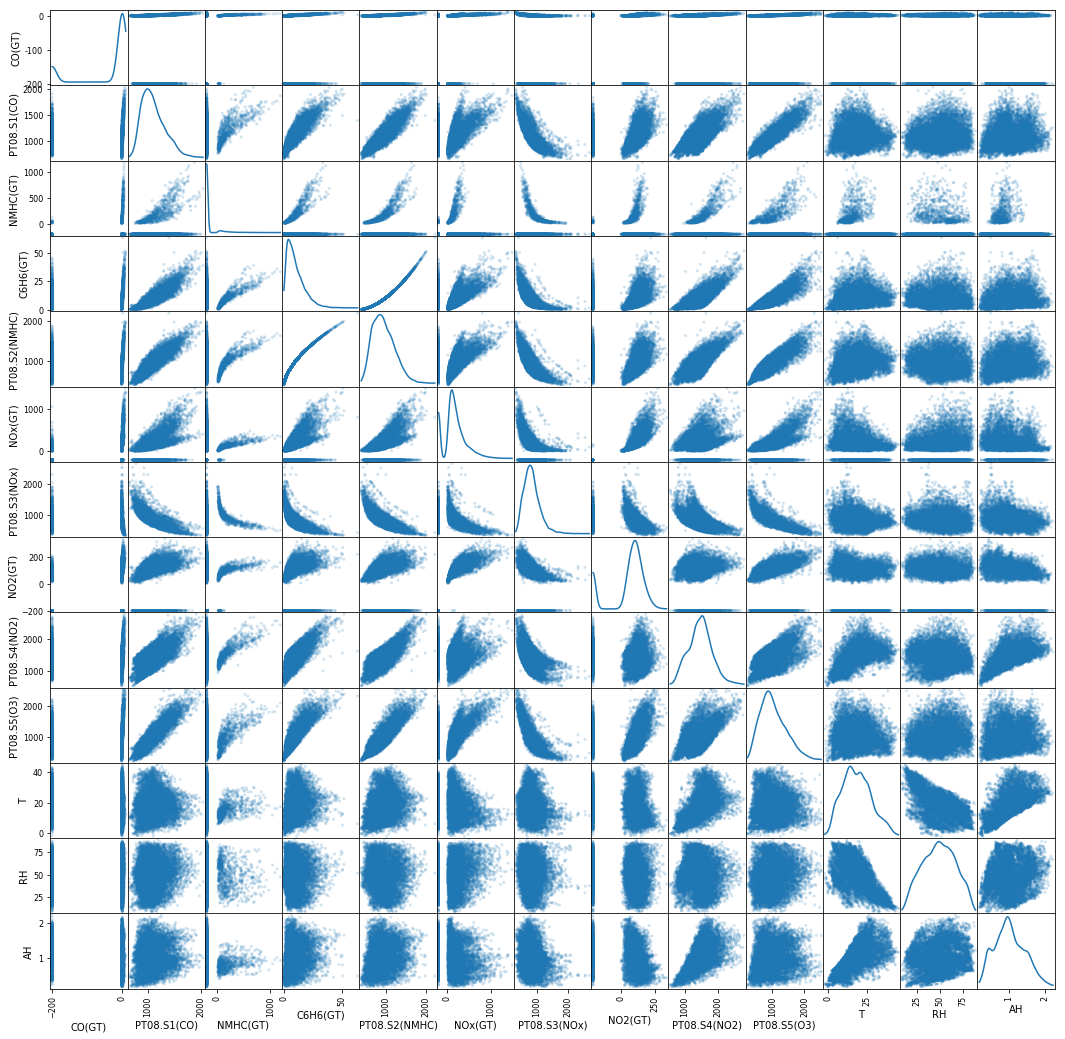

In [68]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(18, 18), diagonal='kde')